## 과적합(Overfitting)을 막는 방법들

- 모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터. 즉, 검증 데이터나 테스트 데이터에 대해서는 제대로 동작하지 않음 
- 모델이 학습 데이터를 불필요할 정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태

#### 데이터의 양을 늘리기 
- Data Augmentation
- 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식

##### 모델의 복잡도 줄이기

In [4]:
import torch 
import torch.nn as nn

In [5]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.relu = nnReLU()
    self.fc3 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return out

- 위 인공 신경망이 입력 데이터에 과적합 현상을 보인다면, 다음과 같이 인공 신경망의 복잡도를 줄일 수 있음 

In [7]:
class Architecture1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Architecture1, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
    
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

- 인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 수용력(capacity)이라고 함 

#### 가중치 규제(Regularization) 적용 

- L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가
- L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가 =가중치 감쇠(weight decay)

- 파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정

In [9]:
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

#### 드롭아웃(Dropout)

- 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법

- 예를 들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용

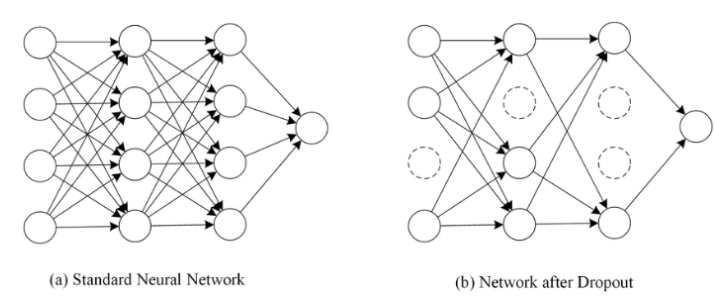

- 드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적